In [2]:
import cv2
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import shutil
import matplotlib.pyplot as plt

In [4]:
def minimum_size_image(imgpath):
    cat =9999
    for doc in os.listdir(imgpath):
        for file in os.listdir(os.path.join(imgpath,doc)):
            image_path=os.path.join(imgpath,doc,file)
            image = cv2.imread(image_path)
            height, width, _ = image.shape
            if height<=200 or width <=200:
                print(f'removing image -> {image_path}')
                os.remove(image_path)
                continue
            if height<cat and height<=width :
                cat = height
            elif width<cat and width<=height :
                cat = width
    
    print(f'The minimum height or width of a picure for all the images is -->>{cat}px')  
    return cat

In [5]:
  minSize=minimum_size_image('./house_plant_species/')

removing image -> ./house_plant_species/Calathea/4.jpg
removing image -> ./house_plant_species/Calathea/223.jpg
removing image -> ./house_plant_species/Tulip/208.jpg
removing image -> ./house_plant_species/Tulip/68.jpg
removing image -> ./house_plant_species/Tulip/24.jpg
removing image -> ./house_plant_species/Tulip/72.jpg
removing image -> ./house_plant_species/Ctenanthe/203.jpg
removing image -> ./house_plant_species/Ctenanthe/340.jpg
removing image -> ./house_plant_species/Pothos (Ivy arum)/128.jpg
removing image -> ./house_plant_species/Asparagus Fern (Asparagus setaceus)/156.jpg


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


removing image -> ./house_plant_species/Tradescantia/98.jpg
removing image -> ./house_plant_species/Tradescantia/341.jpg
removing image -> ./house_plant_species/Tradescantia/108.jpg
removing image -> ./house_plant_species/Elephant Ear (Alocasia spp.)/72.jpg
removing image -> ./house_plant_species/African Violet (Saintpaulia ionantha)/187.jpg
removing image -> ./house_plant_species/Iron Cross begonia (Begonia masoniana)/25.png
removing image -> ./house_plant_species/Iron Cross begonia (Begonia masoniana)/186.jpg
removing image -> ./house_plant_species/Iron Cross begonia (Begonia masoniana)/237.jpg
removing image -> ./house_plant_species/Kalanchoe/97.jpg
removing image -> ./house_plant_species/Venus Flytrap/198.jpg
removing image -> ./house_plant_species/Lily of the valley (Convallaria majalis)/378.jpg


libpng warning: iCCP: known incorrect sRGB profile


removing image -> ./house_plant_species/Daffodils (Narcissus spp.)/340.jpg
removing image -> ./house_plant_species/Daffodils (Narcissus spp.)/272.jpg
removing image -> ./house_plant_species/Daffodils (Narcissus spp.)/413.jpg
removing image -> ./house_plant_species/Daffodils (Narcissus spp.)/218.jpg
removing image -> ./house_plant_species/Daffodils (Narcissus spp.)/247.jpg
removing image -> ./house_plant_species/Daffodils (Narcissus spp.)/385.jpg
removing image -> ./house_plant_species/Daffodils (Narcissus spp.)/167.jpg
removing image -> ./house_plant_species/Daffodils (Narcissus spp.)/257.jpg
removing image -> ./house_plant_species/Daffodils (Narcissus spp.)/135.jpg
removing image -> ./house_plant_species/Daffodils (Narcissus spp.)/252.jpg


libpng warning: iCCP: known incorrect sRGB profile


removing image -> ./house_plant_species/Peace lily/348.jpg
removing image -> ./house_plant_species/Begonia (Begonia spp.)/154.jpg
removing image -> ./house_plant_species/Begonia (Begonia spp.)/200.jpg


libpng warning: iCCP: known incorrect sRGB profile


removing image -> ./house_plant_species/Hyacinth (Hyacinthus orientalis)/184.jpg
removing image -> ./house_plant_species/Hyacinth (Hyacinthus orientalis)/297.jpg
The minimum height or width of a picure for all the images is -->>202px


In [9]:
minSize=202

In [10]:
def center_crop_and_resize(image_path, target_size=(minSize, minSize)):
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    min_dim = min(width, height)
    
    x1 = (width - min_dim) // 2
    y1 = (height - min_dim) // 2
    x2 = x1 + min_dim
    y2 = y1 + min_dim
    
    cropped_image = image[y1:y2, x1:x2]
    resized_image = cv2.resize(cropped_image, target_size, interpolation=cv2.INTER_AREA)
    return resized_image

In [12]:
shutil.rmtree('./house_plant_species//Yucca')

In [14]:
shutil.rmtree('./house_plant_species//Kalanchoe/')

In [15]:
def minimum_count_images(img_path):
    hi = []
    for doc in os.listdir(img_path):
        count =0
        for file in os.listdir(os.path.join(img_path,doc)):
            image_path=os.path.join(img_path,doc,file)
            count+=1
        hi.append(count)
    
        print(f'{doc} has -->{count} items.')
    
    print("***********************")
    print("***********************")
    print("***********************")
    print("***********************")
    print("***********************")
    
    print(f'minimum numbers of photos in a folder is {min(hi)}')

    return min(hi)
                

In [16]:
minNum=minimum_count_images('./house_plant_species/')

Money Tree (Pachira aquatica) has -->359 items.
Calathea has -->328 items.
Tulip has -->337 items.
Ctenanthe has -->345 items.
Pothos (Ivy arum) has -->242 items.
Asparagus Fern (Asparagus setaceus) has -->168 items.
ZZ Plant (Zamioculcas zamiifolia) has -->438 items.
Lilium (Hemerocallis) has -->480 items.
Chinese evergreen (Aglaonema) has -->514 items.
Aloe Vera has -->252 items.
Dracaena has -->261 items.
Tradescantia has -->338 items.
Cast Iron Plant (Aspidistra elatior) has -->266 items.
Elephant Ear (Alocasia spp.) has -->331 items.
Schefflera has -->326 items.
Monstera Deliciosa (Monstera deliciosa) has -->547 items.
Birds Nest Fern (Asplenium nidus) has -->290 items.
African Violet (Saintpaulia ionantha) has -->336 items.
Jade plant (Crassula ovata) has -->353 items.
Rattlesnake Plant (Calathea lancifolia) has -->316 items.
Iron Cross begonia (Begonia masoniana) has -->263 items.
Ponytail Palm (Beaucarnea recurvata) has -->197 items.
Rubber Plant (Ficus elastica) has -->291 ite

In [17]:
minNum

168

In [ ]:
for directory in os.listdir('house_plant_species'):
    path = os.path.join('resized_img', directory)
    print(f'Creating directory: {path}')
    os.makedirs(path, exist_ok=True) 
    count=0
    for file in os.listdir(os.path.join('house_plant_species', directory)):
        input_image_path = os.path.join('house_plant_species', directory, file)
        output_image_path = os.path.join('resized_img', directory, file)
        if file.lower().endswith(('.jpg')):
            try:
                resized_image = center_crop_and_resize(input_image_path)
                cv2.imwrite(output_image_path, resized_image)
                print(f'Saved: {output_image_path}')
                count+=1
                if count==minNum:
                    break
            except Exception as e:
                print(f'Error processing {input_image_path}: {e}')

Creating directory: resized_img/Money Tree (Pachira aquatica)
Saved: resized_img/Money Tree (Pachira aquatica)/106.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/208.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/235.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/143.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/80.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/346.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/331.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/273.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/205.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/147.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/256.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/117.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/140.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/250.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/131.jpg
Saved: resized_img/Money Tree (Pachira aquatica)/282.jpg
Saved: resized_img/Money Tr

In [3]:
base_dir = 'resized_img/'
img_size = 202
batch =45

In [4]:
train_ds= tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed=20,
                                                      validation_split=0.2,
                                                      subset='training',
                                                      batch_size=batch,
                                                      image_size=(img_size,img_size))


val_ds= tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed=20,
                                                      validation_split=0.2,
                                                      subset='validation',
                                                      batch_size=batch,
                                                      image_size=(img_size,img_size))

Found 7531 files belonging to 45 classes.
Using 6025 files for training.
Found 7531 files belonging to 45 classes.
Using 1506 files for validation.


In [5]:
spiciesname= train_ds.class_names
spiciesname

['African Violet (Saintpaulia ionantha)',
 'Aloe Vera',
 'Anthurium (Anthurium andraeanum)',
 'Areca Palm (Dypsis lutescens)',
 'Asparagus Fern (Asparagus setaceus)',
 'Begonia (Begonia spp.)',
 'Bird of Paradise (Strelitzia reginae)',
 'Birds Nest Fern (Asplenium nidus)',
 'Boston Fern (Nephrolepis exaltata)',
 'Calathea',
 'Cast Iron Plant (Aspidistra elatior)',
 'Chinese Money Plant (Pilea peperomioides)',
 'Chinese evergreen (Aglaonema)',
 'Christmas Cactus (Schlumbergera bridgesii)',
 'Chrysanthemum',
 'Ctenanthe',
 'Daffodils (Narcissus spp.)',
 'Dracaena',
 'Dumb Cane (Dieffenbachia spp.)',
 'Elephant Ear (Alocasia spp.)',
 'English Ivy (Hedera helix)',
 'Hyacinth (Hyacinthus orientalis)',
 'Iron Cross begonia (Begonia masoniana)',
 'Jade plant (Crassula ovata)',
 'Lilium (Hemerocallis)',
 'Lily of the valley (Convallaria majalis)',
 'Money Tree (Pachira aquatica)',
 'Monstera Deliciosa (Monstera deliciosa)',
 'Orchid',
 'Parlor Palm (Chamaedorea elegans)',
 'Peace lily',
 'Poin

2024-10-01 15:41:42.886155: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


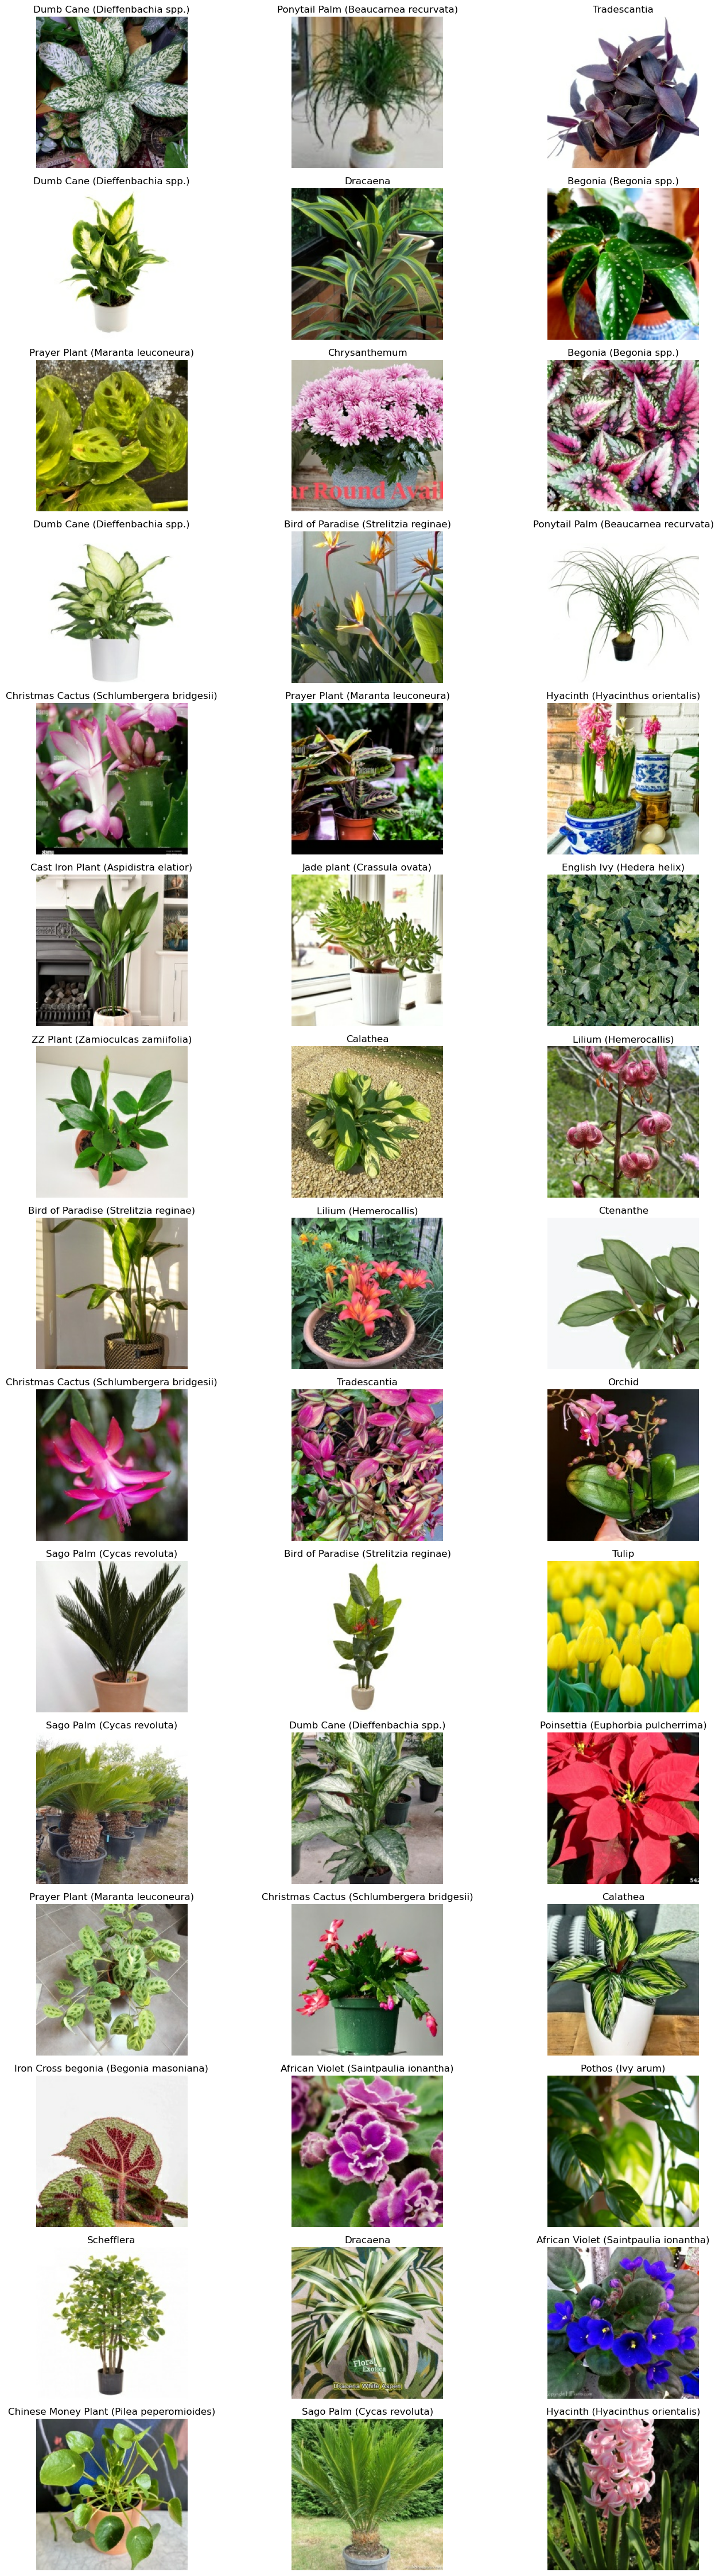

In [7]:
plt.figure(figsize=(15, 45))  

for images, labels in train_ds.take(1):
    for i in range(45):
        plt.subplot(15, 3, i + 1)  
        plt.imshow(images[i].numpy().astype(np.uint8))  
        plt.title(spiciesname[labels[i]])
        plt.axis('off')

plt.tight_layout()  
plt.show()

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [10]:
val_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
data_augmentation=Sequential([
    layers.RandomFlip('horizontal',input_shape=(img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [13]:
# model = Sequential([
#     data_augmentation,
#     layers.Rescaling(1./255),
#     Conv2D(16,3,padding='same',activation='relu'),
#     MaxPooling2D(),
#     Conv2D(32,3,padding='same',activation='relu'),
#     MaxPooling2D(),
#     Conv2D(64,3,padding='same',activation='relu'),
#     MaxPooling2D(),
#     Dropout(0.2),
#     Flatten(),
#     Dense(128,activation='relu'),
#     Dense(45)
    
# ])


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (202, 202, 3)  # Example input shape
num_classes = 45  # Update this to your actual number of classes

# Build the VGG16 model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])




/home/elton_mayo/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [26]:

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 202, 202, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 202, 202, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 101, 101, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 101, 101, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 101, 101, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │    75,501,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 45)             │       184,365 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,181,933 (408.87 MB)

 Trainable params: 107,181,933 (408.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
        train_ds,
    epochs=25,
    validation_data=val_ds
)

Epoch 1/25


In [ ]:


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [43]:
# input_img = tf.keras.utils.load_img('./resized_img/Ctenanthe/170.jpg',target_size=(202,202))
# input_img_arr=tf.keras.utils.img_to_array(input_img)
# input_img_exp_dim=tf.expand_dims(input_img_arr,0)

# prediction=model.predict(input_img_exp_dim)
# result=tf.nn.softmax(prediction[0])
# spiciesname[np.argmax(result)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


'Ctenanthe'

In [26]:
model.save('plant_species_recognition_model222.keras')

In [30]:
from tensorflow.keras.models import load_model

model2 = load_model('plant_species_recognition_model222.keras')


In [34]:
# input_img = tf.keras.utils.load_img('../istockphoto-1405224849-612x612.jpg',target_size=(202,202))
def classify_image(image_path):
    input_img=center_crop_and_resize(image_path)
    input_img_arr=tf.keras.utils.img_to_array(input_img)
    input_img_exp_dim=tf.expand_dims(input_img_arr,0)
    
    prediction=model2.predict(input_img_exp_dim)
    result=tf.nn.softmax(prediction[0])
    spiciesname[np.argmax(result)]
    outcome = 'The Image Belongs To ' + spiciesname[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
    return outcome

In [37]:
classify_image('../img.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


'The Image Belongs To Areca Palm (Dypsis lutescens) with a score of 99.97188448905945'